In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập style chung cho biểu đồ
sns.set(style="darkgrid")

# Đọc dữ liệu từ file CSV
file_name = "diabetes.csv"
df_diabetes = pd.read_csv(file_name)

print("Kích thước dữ liệu ban đầu:", df_diabetes.shape)
print(df_diabetes.head())

Kích thước dữ liệu ban đầu: (768, 9)
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [4]:
# 1. Loại bỏ các dòng dữ liệu trùng lặp
so_dong_trung = df_diabetes.duplicated().sum()
if so_dong_trung > 0:
    df_diabetes.drop_duplicates(inplace=True)
print(f"Đã loại bỏ {so_dong_trung} dòng trùng lặp. Kích thước mới: {df_diabetes.shape}")

# 2. Xử lý dữ liệu thiếu (các giá trị 0 bất thường)
# Các cột không thể có giá trị 0 về mặt y tế
cols_with_missing_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Thay thế 0 bằng np.nan (giá trị thiếu)
for col in cols_with_missing_zeros:
    df_diabetes[col] = df_diabetes[col].replace(0, np.nan)

# Điền các giá trị thiếu (NaN) bằng giá trị TRUNG VỊ (median) của cột đó
for col in cols_with_missing_zeros:
    median_val = df_diabetes[col].median()
    df_diabetes[col].fillna(median_val, inplace=True)

print("Đã xử lý và điền các giá trị 0 bất thường (dữ liệu thiếu).")

Đã loại bỏ 0 dòng trùng lặp. Kích thước mới: (768, 9)
Đã xử lý và điền các giá trị 0 bất thường (dữ liệu thiếu).


C:\Users\ASUS\AppData\Local\Temp\ipykernel_33000\3567630943.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_diabetes[col].fillna(median_val, inplace=True)


In [3]:
corr_matrix = df_diabetes.corr(numeric_only=True)

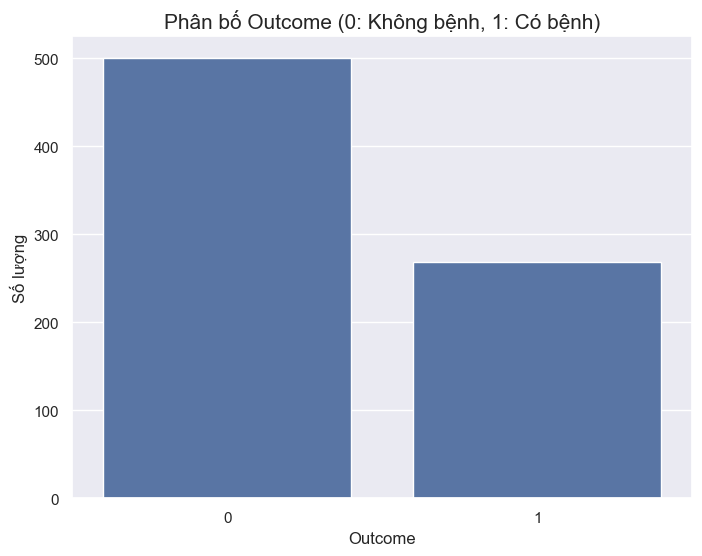

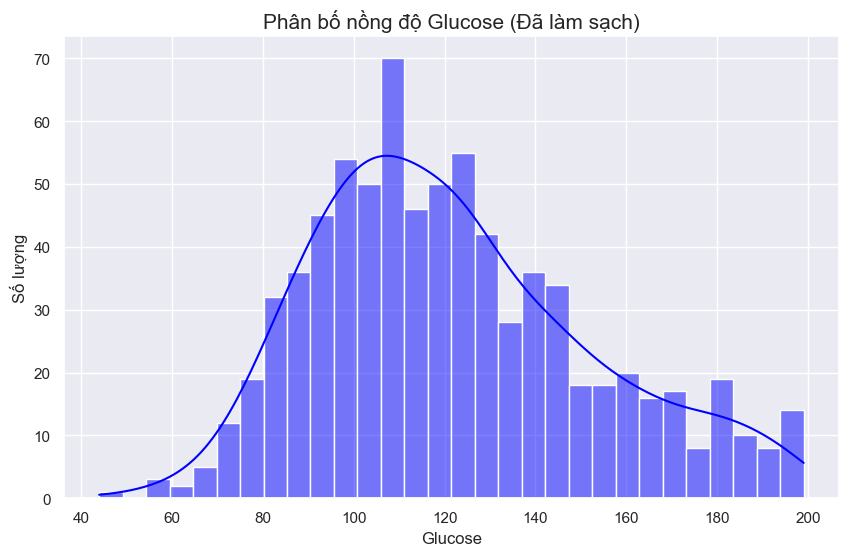

In [5]:
# a. Phân bố của Outcome (Biến mục tiêu)
plt.figure(figsize=(8, 6))
sns.countplot(data=df_diabetes, x='Outcome')
plt.title('Phân bố Outcome (0: Không bệnh, 1: Có bệnh)', fontsize=15)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.show()

# b. Phân bố của 'Glucose' (Nồng độ đường)
plt.figure(figsize=(10, 6))
sns.histplot(df_diabetes['Glucose'], bins=30, kde=True, color='blue') 
plt.title('Phân bố nồng độ Glucose (Đã làm sạch)', fontsize=15)
plt.xlabel('Glucose', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.show()

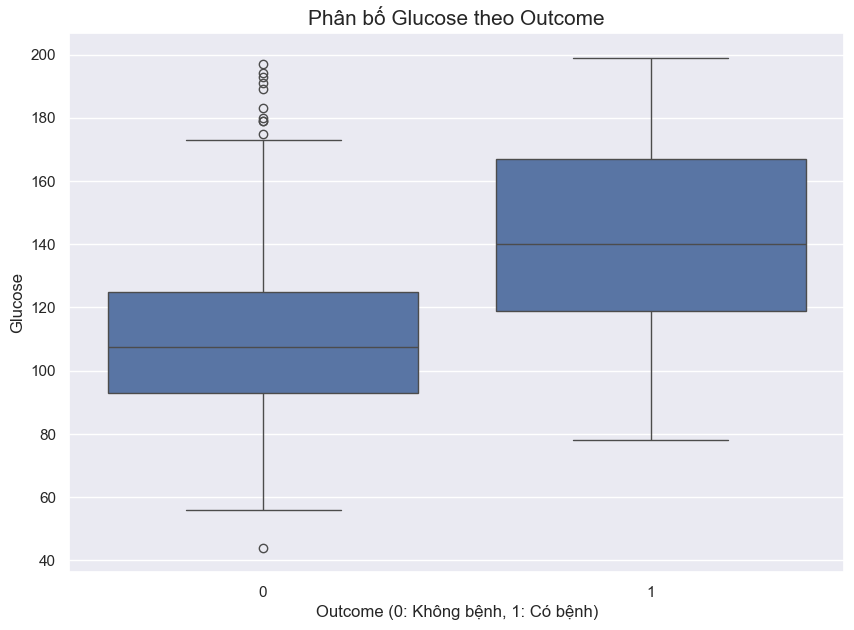

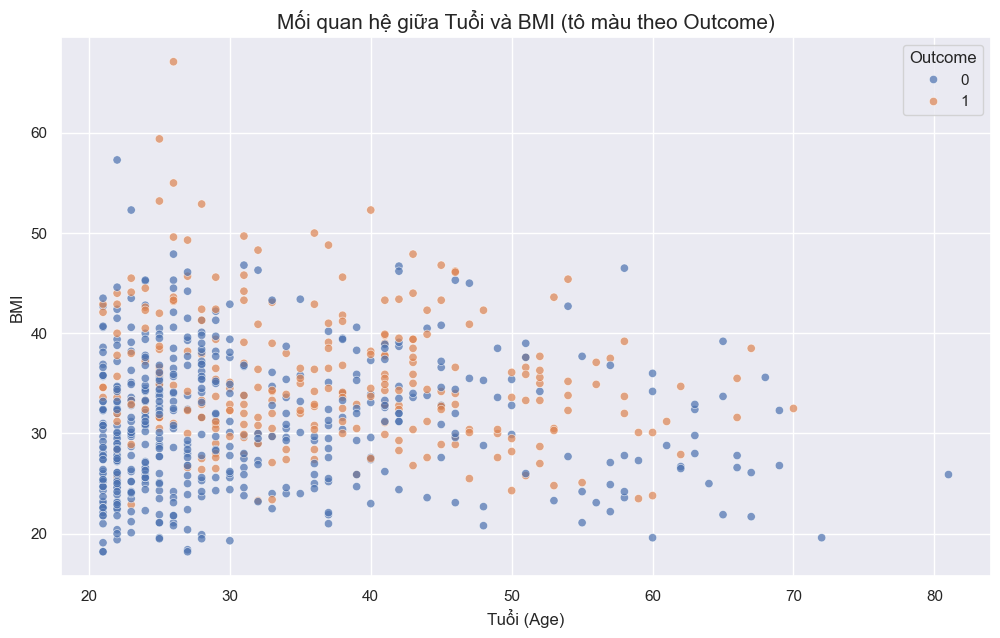

In [6]:
# a. Boxplot: So sánh 'Glucose' giữa 2 nhóm 'Outcome'
plt.figure(figsize=(10, 7))
sns.boxplot(data=df_diabetes, x='Outcome', y='Glucose')
plt.title('Phân bố Glucose theo Outcome', fontsize=15)
plt.xlabel('Outcome (0: Không bệnh, 1: Có bệnh)', fontsize=12)
plt.ylabel('Glucose', fontsize=12)
plt.show()

# b. Scatter plot: Mối quan hệ giữa 'Age' (Tuổi) và 'BMI'
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_diabetes, x='Age', y='BMI', hue='Outcome', alpha=0.7)
plt.title('Mối quan hệ giữa Tuổi và BMI (tô màu theo Outcome)', fontsize=15)
plt.xlabel('Tuổi (Age)', fontsize=12)
plt.ylabel('BMI', fontsize=12)
plt.show()

In [ ]:
# a. Ma trận tương quan (Heatmap)
# Tính toán ma trận tương quan
corr_matrix = df_diabetes.corr()

# Vẽ bản đồ nhiệt
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Ma trận tương quan giữa các biến', fontsize=15)
plt.show()